<a href="https://colab.research.google.com/github/reeruryu/VISIONEERS_study/blob/main/w03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분류




## **5.1 이항 분류**

reeruryu 깃허브에 웹 크롤링 공부했던 거 올려놨다 😎

In [50]:
# 외부에서 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print('red>>')
print(red.head())
print()
print('white>>')
print(white.head())

red>>
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8    

In [51]:
# 와인 데이터셋 합치기
red['type']=0 # 레드 와인 0
white['type']=1 # 화이트 와인 1

print(red.head(2))
print(white.head(2))

wine=pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

mean이 약 0.75고 퍼센트를 보면 1이 더 많다는 걸 지레짐작 가능하다

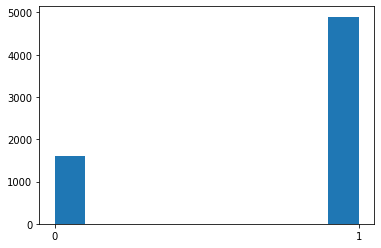

1    4898
0    1599
Name: type, dtype: int64


In [6]:
# 레드 와인, 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [8]:
# 데이터 요약 정보 확인
print(wine.info())

data pa-ak>>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


⛄ 최소-최대 정규화

>데이터를 정규화하는 가장 일반적인 방법


>모든 feature에 대해 각각의 최소값 0 최대값 1로


>다른 값들은 0과 1 사이의 값으로 변환

> X-min/max-min



In [9]:
# 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max()-wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [10]:
# 데이터를 섞은 후 넘파이 array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1) # frac=1 100% 비율 행을 랜덤하게 뽑음
print(wine_shuffle.head()) # 1 1 1 0 1 ..
wine_np = wine_shuffle.to_numpy() # 데이터프레임 -> numpy array
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
544        0.247934          0.133333     0.102410        0.203988   0.063123   
11         0.396694          0.100000     0.240964        0.055215   0.043189   
3497       0.322314          0.233333     0.602410        0.296779   0.038206   
1451       0.330579          0.160000     0.265060        0.032209   0.157807   
3935       0.264463          0.253333     0.120482        0.246933   0.061462   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
544              0.166667              0.359447  0.215732  0.379845   
11               0.055556              0.237327  0.146327  0.325581   
3497             0.142361              0.364055  0.198766  0.441860   
1451             0.024306              0.025346  0.196838  0.472868   
3935             0.170139              0.410138  0.228841  0.279070   

      sulphates   alcohol   quality  type  
544    0.162921  0.144928  0.500000   1.0 

In [11]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8) # 4:1
train_X , train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:,:-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.24793388 0.13333333 0.10240964 0.20398773 0.06312292 0.16666667
 0.359447   0.21573164 0.37984496 0.16292135 0.14492754 0.5       ]
1.0
[0.2892562  0.16       0.20481928 0.09202454 0.03820598 0.07986111
 0.24423963 0.153075   0.3875969  0.13483146 0.26086957 0.5       ]
1.0
[0. 1.]
[0. 1.]


to_categorical 함수로 정답의 인코딩 방식을 바꾼 결과

0.0 -> [1. 0.], 1.0 -> [0. 1.]

⛄ softmax


> 3개 이상으로 분류하는 다중 클래스 분류에서 사용되는 활성화 함수



> 분류될 클래스가 n개라 할 때, n차원의 벡터를 입력받아, 각 클래스에 속할 확률 추정


> 큰 값 강조, 작은 값 약화하는 효과







In [32]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),                  
    tf.keras.layers.Dense(units=2, activation='softmax')
]) # 분류 모델이기 때무네 마지막 레이어의 활성화 함수로 softmax 사용

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 48)                624       
                                                                 
 dense_17 (Dense)            (None, 24)                1176      
                                                                 
 dense_18 (Dense)            (None, 12)                300       
                                                                 
 dense_19 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 와인 데이터셋에 대한 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size = 32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.1231 - accuracy: 0.9554 - val_loss: 0.0820 - val_accuracy: 0.9677
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9828 - val_loss: 0.0649 - val_accuracy: 0.9823
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9846 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9864 - val_loss: 0.0580 - val_accuracy: 0.9838
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0531 - val_accuracy: 0.9869
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0406 - val_accuracy: 0.9877
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 

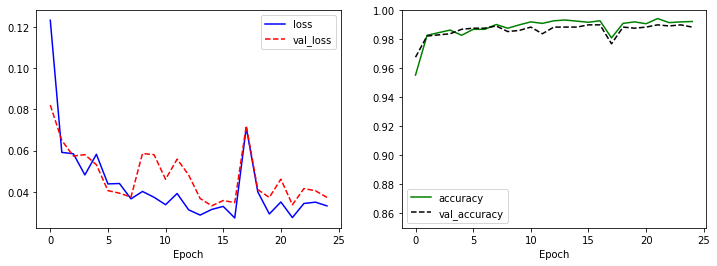

In [35]:
# 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.85, 1)
plt.legend()

plt.show()

In [36]:
# 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9938


[0.028514031320810318, 0.9938461780548096]

정확도 99.38%로 레드 와인과 화이트 와인을 분류하였다~

## **5.2 다항 분류**

다항 분류란 범주 수가 2개 초과할 경우 ..

아까 와인 데이터셋에서 Y를 색깔 대신 품질로 예측해보겠다

In [52]:
# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


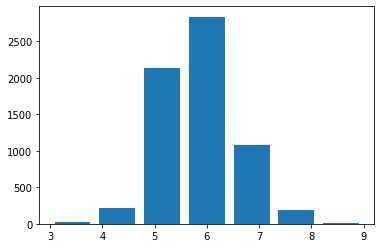

In [38]:
# 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

데이터의 양이 작고 범주의 수가 너무 많은데다가

각 데이터의 숫자가 차이 나서..

3-5 나쁨, 6 보통, 7-9 좋음으로 재분류를 하겠다

In [53]:
# 품질을 3개의 범주로 재분류
wine.loc[wine['quality']<=5, 'new_quality']=0 # new_quality라는 속성을 만드러서 넣어주자
wine.loc[wine['quality']==6, 'new_quality']=1
wine.loc[wine['quality']>=7, 'new_quality']=2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


loc 예제 🌼

In [40]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0, 'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [54]:
# 데이터 정규화 및 훈련 데이터와 테스트 데이터 분리
del wine['quality'] # 기존 품질 속성 삭제
wine_norm = (wine-wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [57]:
# 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),     
    tf.keras.layers.Dense(units=12, activation='relu'),                  
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.4727 - accuracy: 0.7809 - val_loss: 0.3921 - val_accuracy: 0.8315
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.7888 - val_loss: 0.3956 - val_accuracy: 0.8315
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7911 - val_loss: 0.4972 - val_accuracy: 0.7277
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.7880 - val_loss: 0.3851 - val_accuracy: 0.8315
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7975 - val_loss: 0.3937 - val_accuracy: 0.7946
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7914 - val_loss: 0.3769 - val_accuracy: 0.8315
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.7965 - val_loss: 0.4085 - val_accuracy: 0.8315
Epoch 

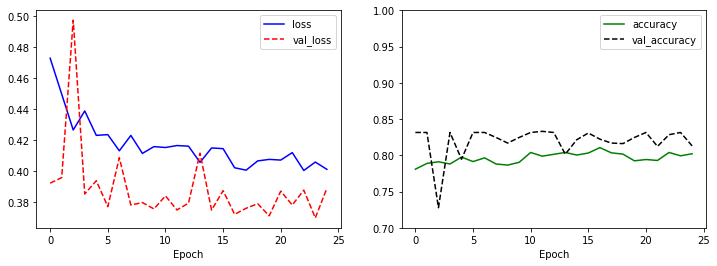

In [58]:
# 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

홀리..

loss가 꾸준히 작아지긴하나, val_loss가 더 작고

val_acurracy도 accuracy보다 크다 ㅋㅋ?

할 게 많아서 일단 넘어갔다

In [59]:
# 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8285


[0.3901008367538452, 0.8284615278244019]

정확도는 82.85% 나왔다



## **5.3 Fashion MNIST**

In [64]:
# Fashion MNIST 데이터세트 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4431872/4422102 [==============================] - 0s 0us/step
60000 10000


훈련 데이터 6만 장, 테스트 데이터 만 장의 이미지

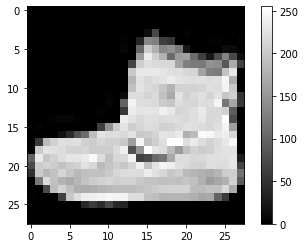

9


In [65]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar() # gray(255) bar
plt.show()

print(train_Y[0])

회색 도시 속 그녀가 신은 민트색 nike shoes~

In [66]:
# 데이터 정규화
train_X = train_X / 255.0 # min 0, max 255
test_X = test_X / 255.0

#print(train_X[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)

test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

같이 원-핫 인코딩을 안하는 이유?

메모리 낭비

In [67]:
# Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),                         
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dense_53 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


원-핫 인코딩이 아닌 정답 행렬을 처리하기 위해 바뀐 부분

loss='sparse_categorial_crossentropy'

별도의 데이터 전처리 없이 희소 행렬을 나타내는 데이터를

정답 행렬로 사용할 수 있다

원본이 28x28의 2차원 array이기 때문에 데이터를 일렬로 정렬하는

Flatten 레이어를 사용한다 (다차원 데이터 -> 1차원 정렬)

In [68]:
# Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5358 - accuracy: 0.8118 - val_loss: 0.4235 - val_accuracy: 0.8495
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3937 - accuracy: 0.8595 - val_loss: 0.3941 - val_accuracy: 0.8541
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3537 - accuracy: 0.8706 - val_loss: 0.3587 - val_accuracy: 0.8689
Epoch 4/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3241 - accuracy: 0.8817 - val_loss: 0.3578 - val_accuracy: 0.8722
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3027 - accuracy: 0.8888 - val_loss: 0.3327 - val_accuracy: 0.8800
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2878 - accuracy: 0.8938 - val_loss: 0.3442 - val_accuracy: 0.8805
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2752 - accuracy: 0.8988 - val_loss: 0.3365 - val_accurac

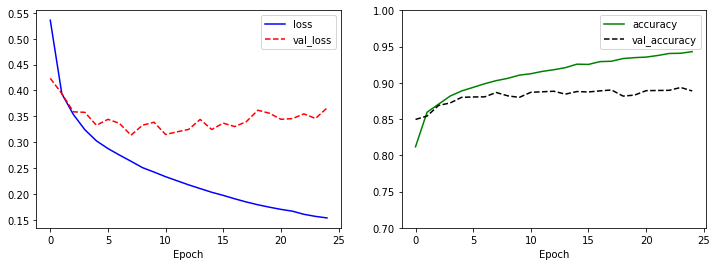

In [71]:
# Fashion MNIST 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

검증 데이터의 손실이 감소하다가 시간이 지날수록

서서히 증가하는 과적합 현상을 확인할 수 있다

Therefore, tf.keras.callbacks.EarlyStopping 사용하면 된다